In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm, beta, gamma
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [6]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = spearmanr(x, y)[0]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

def plot(x):
    # Create the default pairplot
    grid = sns.pairplot(
        pd.DataFrame(x), height=3
    )

    # Map a scatter plot and Pearson correlation coefficient to the upper triangle
    grid = grid.map_upper(plt.scatter)
    grid = grid.map_upper(corr)

    # Map a histogram to the diagonal
    # grid = grid.map_diag(plt.hist)

    # Map a density plot and regression line to the lower triangle
    grid = grid.map_lower(sns.kdeplot)
    grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

In [ ]:
# Probabilités de défaut implicites

In [7]:
def proba_defaut(spread, T=4, recovery = 0.4):
    lambd = spread / (1-recovery)
    return 1-np.exp(-T*lambd)

In [ ]:
# Spread de maturité 4 ans
spread_bnp = 0.01
spread_sg = 0.012

# Proba de défaut
print("Maturité 4 ans\n") 
print("Proba de défaut BNP:\t", proba_defaut(spread = spread_bnp))
print("Proba de défaut SG:\t", proba_defaut(spread = spread_sg))



Maturité 4 ans

Proba de défaut BNP:	 0.06449301496838222
Proba de défaut BSG:	 0.07688365361336424


In [9]:
# Spread de maturité 5 ans
spread_bnp = 0.012
spread_sg = 0.015

# Proba de défaut
print("Maturité 4 ans\n") 
print("Proba de défaut BNP:\t", proba_defaut(spread = spread_bnp))
print("Proba de défaut SG:\t", proba_defaut(spread = spread_sg))



Maturité 4 ans

Proba de défaut BNP:	 0.07688365361336424
Proba de défaut SG:	 0.09516258196404048


In [ ]:
# Caractérisation des taux de recoubvrement

In [40]:
def recovery_rate(mu, sigma, size=100000):
    a = mu*(mu*(1-mu)/sigma**2 - 1)
    b =(1- mu)*(mu*(1-mu)/sigma**2 - 1)
    return  np.random.beta(a,b, size=size)
    


In [41]:
recovery_bnp = recovery_rate(mu = 0.6, sigma = 0.15)
recovery_sg = recovery_rate(mu = 0.3, sigma = 0.25)


C:\Users\DEBA\AppData\Local\Temp\ipykernel_16320\224913857.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recovery_bnp, label="BNP", shade=True)
C:\Users\DEBA\AppData\Local\Temp\ipykernel_16320\224913857.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recovery_sg, label="SG", shade=True)


Text(0, 0.5, 'Densit')

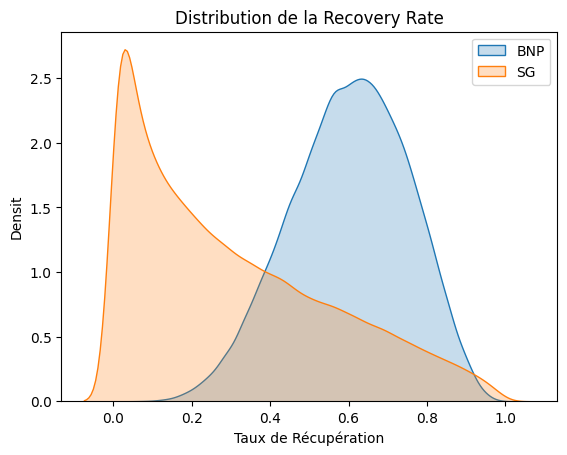

In [42]:
# Tracer les distributions KDE
sns.kdeplot(recovery_bnp, label="BNP", shade=True)
sns.kdeplot(recovery_sg, label="SG", shade=True)

# Ajouter la légende et afficher le graphe
plt.legend()
plt.title("Distribution de la Recovery Rate")
plt.xlabel("Taux de Récupération")
plt.ylabel("Densit")

In [ ]:
# Historiques des actions

In [90]:
stock = pd.read_csv("data.txt", sep = "\t")

<Axes: >

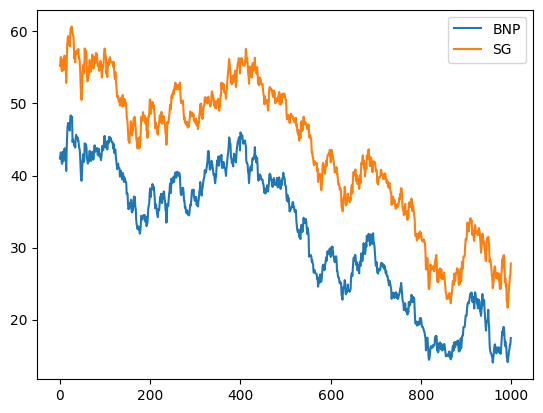

In [91]:
stock.plot()

In [97]:
stock = np.log(stock) - np.log(stock.shift())
stock.dropna(inplace=True)

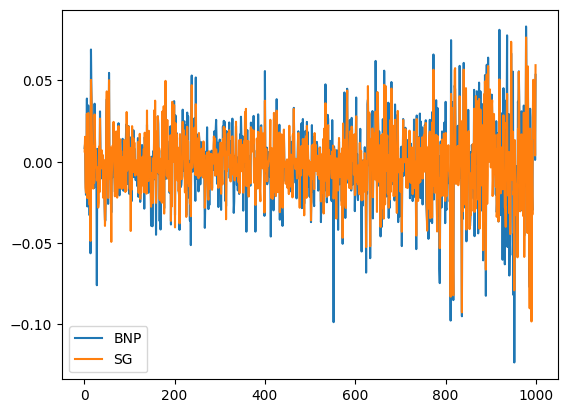

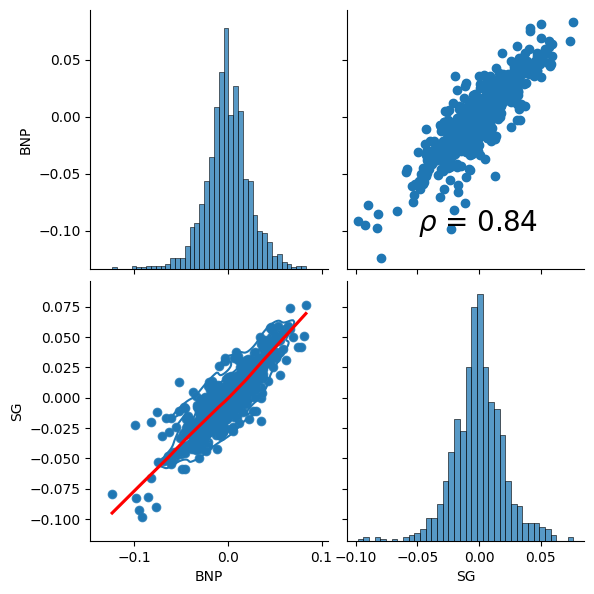

In [98]:
stock.plot()
plot(stock)

In [99]:
from skew_student import *
from scipy.stats import kstest, norm

In [100]:
param_bnp = optimize_parameters(stock["BNP"])
param_sg = optimize_parameters(stock["SG"])

d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


In [114]:
mu, sigma, gamma, nu = param_bnp
sim_bnp = skew_student_sim(mu, sigma, gamma, nu, size = 100000)

mu, sigma, gamma, nu = param_sg
sim_sg = skew_student_sim(mu, sigma, gamma, nu, size = 100000)

In [118]:
def summary(df_observed, df_simulated):
        
        # Perform the KS test against a standard normal distribution
        ks_statistic, p_value = kstest(df_observed,df_simulated)
        print("KS Statistic:", ks_statistic)
        print("p-value:", p_value)
        
        """Generate a QQ plot comparing observed and simulated data."""
        quantiles_x = np.percentile(df_observed, np.linspace(0, 100, len(df_observed)))
        quantiles_y = np.percentile(df_simulated, np.linspace(0, 100, len(df_observed)))

        fig = plt.figure(figsize=(8, 6))
        plt.scatter(quantiles_x, quantiles_y, alpha=0.5)
        plt.plot([min(quantiles_x), max(quantiles_x)], [min(quantiles_x), max(quantiles_x)], color='red', linestyle='--')
        plt.title('QQ Plot Comparing Quantiles of Observed and Simulated Data')
        plt.xlabel('Empirical Quantiles')
        plt.ylabel('Theoretical Quantiles')
        plt.grid(True)
        plt.legend()
        
        
        

KS Statistic: 0.01967653653653656
p-value: 0.8310092736748413
KS Statistic: 0.025595555555555594
p-value: 0.5276764633414418


C:\Users\DEBA\AppData\Local\Temp\ipykernel_16320\2869023930.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


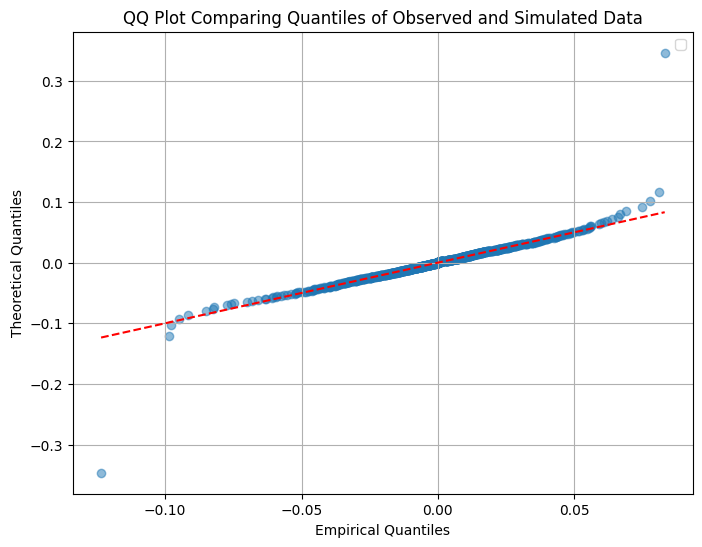

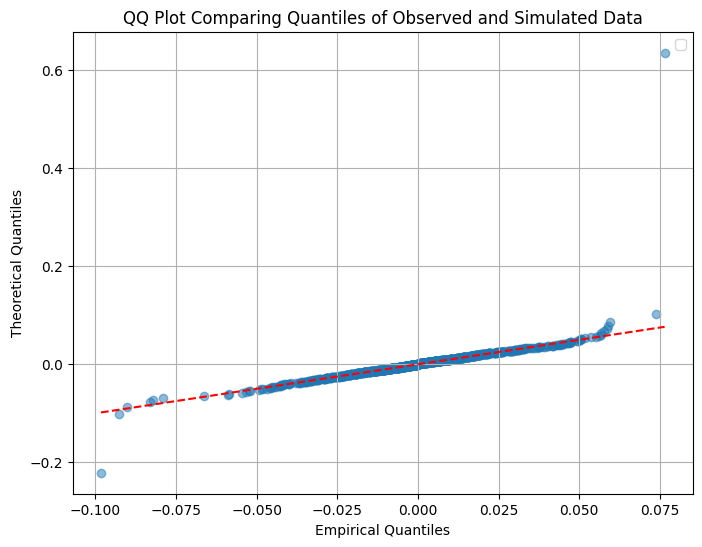

In [119]:
summary(stock["BNP"], sim_bnp)
summary(stock["SG"], sim_sg)

In [120]:
param_bnp

array([ 1.94963296e-03,  1.88612782e-02, -1.52042200e-01,  4.58745073e+00])

In [121]:
param_sg

array([-1.72713066e-03,  1.59158784e-02,  7.31422255e-02,  4.58450639e+00])

In [ ]:
# Modélisation de la structure de dépendance 

In [194]:
# Transformation U = F_X(X)
def F_X(data):
    X_sorted = np.sort(data)
    F = np.array([np.sum(X_sorted<=x) for x in data]) / len(data)
    return F
    

In [125]:
U_bnp = F_X(stock["BNP"])
U_sg = F_X(stock["SG"])
U = np.array([U_bnp, U_sg]).T

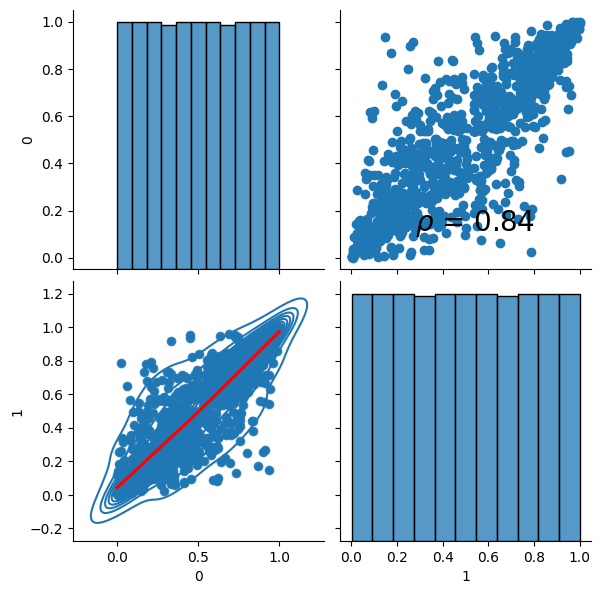

In [ ]:
# Dépendogramme
plot(U)

In [154]:
from copulas.bivariate import Clayton, Gumbel, Frank
from scipy.stats import pearsonr

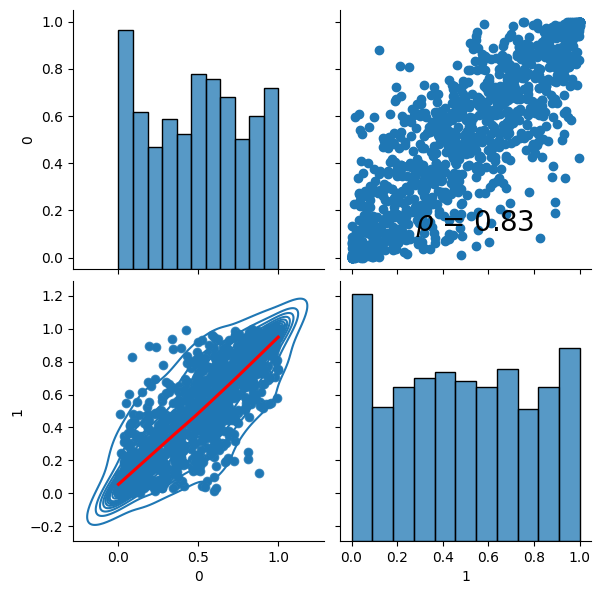

In [227]:
## Structure de dépendance gaussienne
df = 5
omega = np.corrcoef(U.T)
mean = np.array([0,0])
x = np.random.multivariate_normal(mean,omega,len(U))
chi_2 = np.random.chisquare(df=df,size=len(U)).reshape(-1, 1)
z = x/np.sqrt(chi_2/df)
z = norm.cdf(z, loc=0, scale =1)
plot(z)

In [253]:
from joblib import Parallel, delayed

def H(data, n_jobs=-1):
    """
    Compute the ECDF for each data point using parallel processing.

    Parameters:
        data (numpy.ndarray): A 2D array of shape (n, 2), where each row is a pair (X, Y).
        n_jobs (int): Number of jobs for parallel processing. Default is -1 (use all cores).

    Returns:
        numpy.ndarray: An array of ECDF values for each data point.
    """
    n = len(data)

    def compute_ecdf(i):
        X_excluded = np.delete(data[:, 0], i)
        Y_excluded = np.delete(data[:, 1], i)
        count = np.sum((X_excluded <= data[i, 0]) & (Y_excluded <= data[i, 1]))
        return count / (n - 1)

    # Use joblib for parallel processing
    F = Parallel(n_jobs=n_jobs)(delayed(compute_ecdf)(i) for i in range(n))
    return np.array(F)
    

In [254]:
H_emp = H(U)

In [255]:
def MC_H(df, omega, S = 100):
    ## Structure de dépendance gaussienne
    mean = np.array([0,0])
    H_s = []
    for s in range(S):
        x = np.random.multivariate_normal(mean,omega,len(U))
        chi_2 = np.random.chisquare(df=df,size=len(U)).reshape(-1, 1)
        z = x/np.sqrt(chi_2/df)
        H_s.append(H(norm.cdf(z, loc=0, scale =1)))
    H_s = np.array(H_s)
    return np.mean(H_s, axis=0)


In [256]:
H_theo = MC_H(3, omega)

C:\Users\DEBA\AppData\Local\Temp\ipykernel_16320\3297449165.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


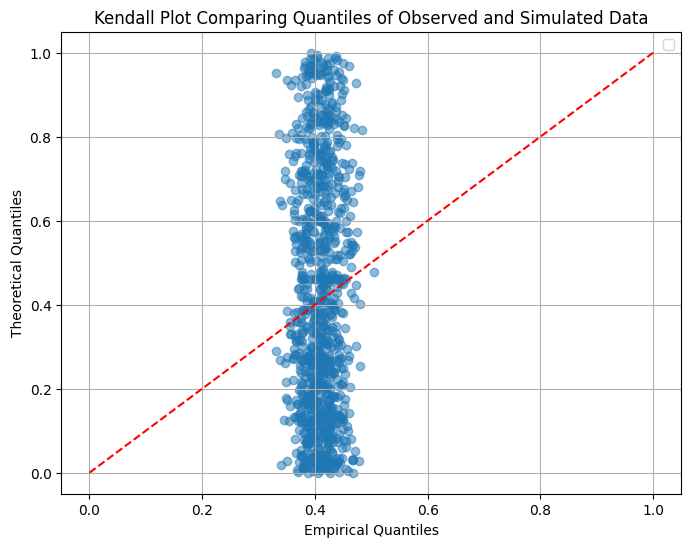

In [257]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(H_theo, H_emp, alpha=0.5)
plt.plot([0,1], [0, 1], color='red', linestyle='--')
plt.title('Kendall Plot Comparing Quantiles of Observed and Simulated Data')
plt.xlabel('Empirical Quantiles')
plt.ylabel('Theoretical Quantiles')
plt.grid(True)
plt.legend()